In [1]:
import tensorflow as tf
import utilities as ut
import importlib
from tensorflow import keras
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Input, Conv3D, MaxPool3D, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.models import Sequential
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from gen.frame_generator import FrameGenerator
import os
from keras.layers import Lambda, Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
import pandas as pd
import cv2 
import numpy as np

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Proposed alternative


In [2]:
Input_Layer = Input(shape=(16,224,224,4),name='Input Layer') 
#RGB Stream
RGB_Layer1 = Lambda(lambda x: x[:,:,:,:,:3])(Input_Layer)
RGB_Layer2 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer1)
RGB_Layer3 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer2)
RGB_Layer4 = MaxPool3D((1,2,2))(RGB_Layer3)
RGB_Layer5 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer4)
RGB_Layer6 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer5)
RGB_Layer7 = MaxPool3D((1,2,2))(RGB_Layer6)

RGB_Layer8 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer7)
RGB_Layer9 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer8)
RGB_Layer10 = MaxPool3D((1,2,2))(RGB_Layer9)
RGB_Layer11 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer10)
RGB_Layer12 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer11)
RGB_Layer13 = MaxPool3D((1,2,2))(RGB_Layer12)

#Frame Differences Stream
Diff_Layer1 = Lambda(lambda x: x[:,:,:,:,3:])(Input_Layer)
Diff_Layer2 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer1)
Diff_Layer3 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer2)
Diff_Layer4 = MaxPool3D((1,2,2))(Diff_Layer3)
Diff_Layer5 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer4)
Diff_Layer6 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer5)
Diff_Layer7 = MaxPool3D((1,2,2))(Diff_Layer6)

Diff_Layer8 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer7)
Diff_Layer9 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Diff_Layer8)
Diff_Layer10 = MaxPool3D((1,2,2))(Diff_Layer9)
Diff_Layer11 = Conv3D(filters=32, kernel_size=(1,3,3),activation='sigmoid',padding='same',kernel_initializer='he_normal')(Diff_Layer10)
Diff_Layer12 = Conv3D(filters=32, kernel_size=(3,1,1),activation='sigmoid',padding='same',kernel_initializer='he_normal')(Diff_Layer11)
Diff_Layer13 = MaxPool3D((1,2,2))(Diff_Layer12)


#Fusion and Pooling
Fusion_Layer = Multiply()([RGB_Layer13,Diff_Layer13])
Pool = MaxPool3D((2,1,1))(Fusion_Layer)

#Merging Block
Merge_Layer_2 = Conv3D(filters=64, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Pool)
Merge_Layer_3 = Conv3D(filters=64, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_2)
Merge_Layer_4 = MaxPool3D((2,2,2))(Merge_Layer_3)

Merge_Layer_5 = Conv3D(filters=64, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_4)
Merge_Layer_6 = Conv3D(filters=64, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_5)

Merge_Layer_7 = MaxPool3D((2,2,2))(Merge_Layer_6)

Merge_Layer_2_2 = Conv3D(filters=128, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_7)
Merge_Layer_2_3 = Conv3D(filters=128, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_2_2)
Merge_Layer_2_4 = MaxPool3D((1,2,2))(Merge_Layer_2_3)


#Fully Connected Layers
FC_1 = Flatten()(Merge_Layer_2_4)
FC_2 = Dense(128,activation='relu')(FC_1)
FC_3 = Dropout(0.2)(FC_2)
FC_4 = Dense(32,activation='relu')(FC_3)

output = Dense(2,activation='softmax')(FC_4)

model_diff = Model(inputs=Input_Layer,outputs=output)

## Plot model

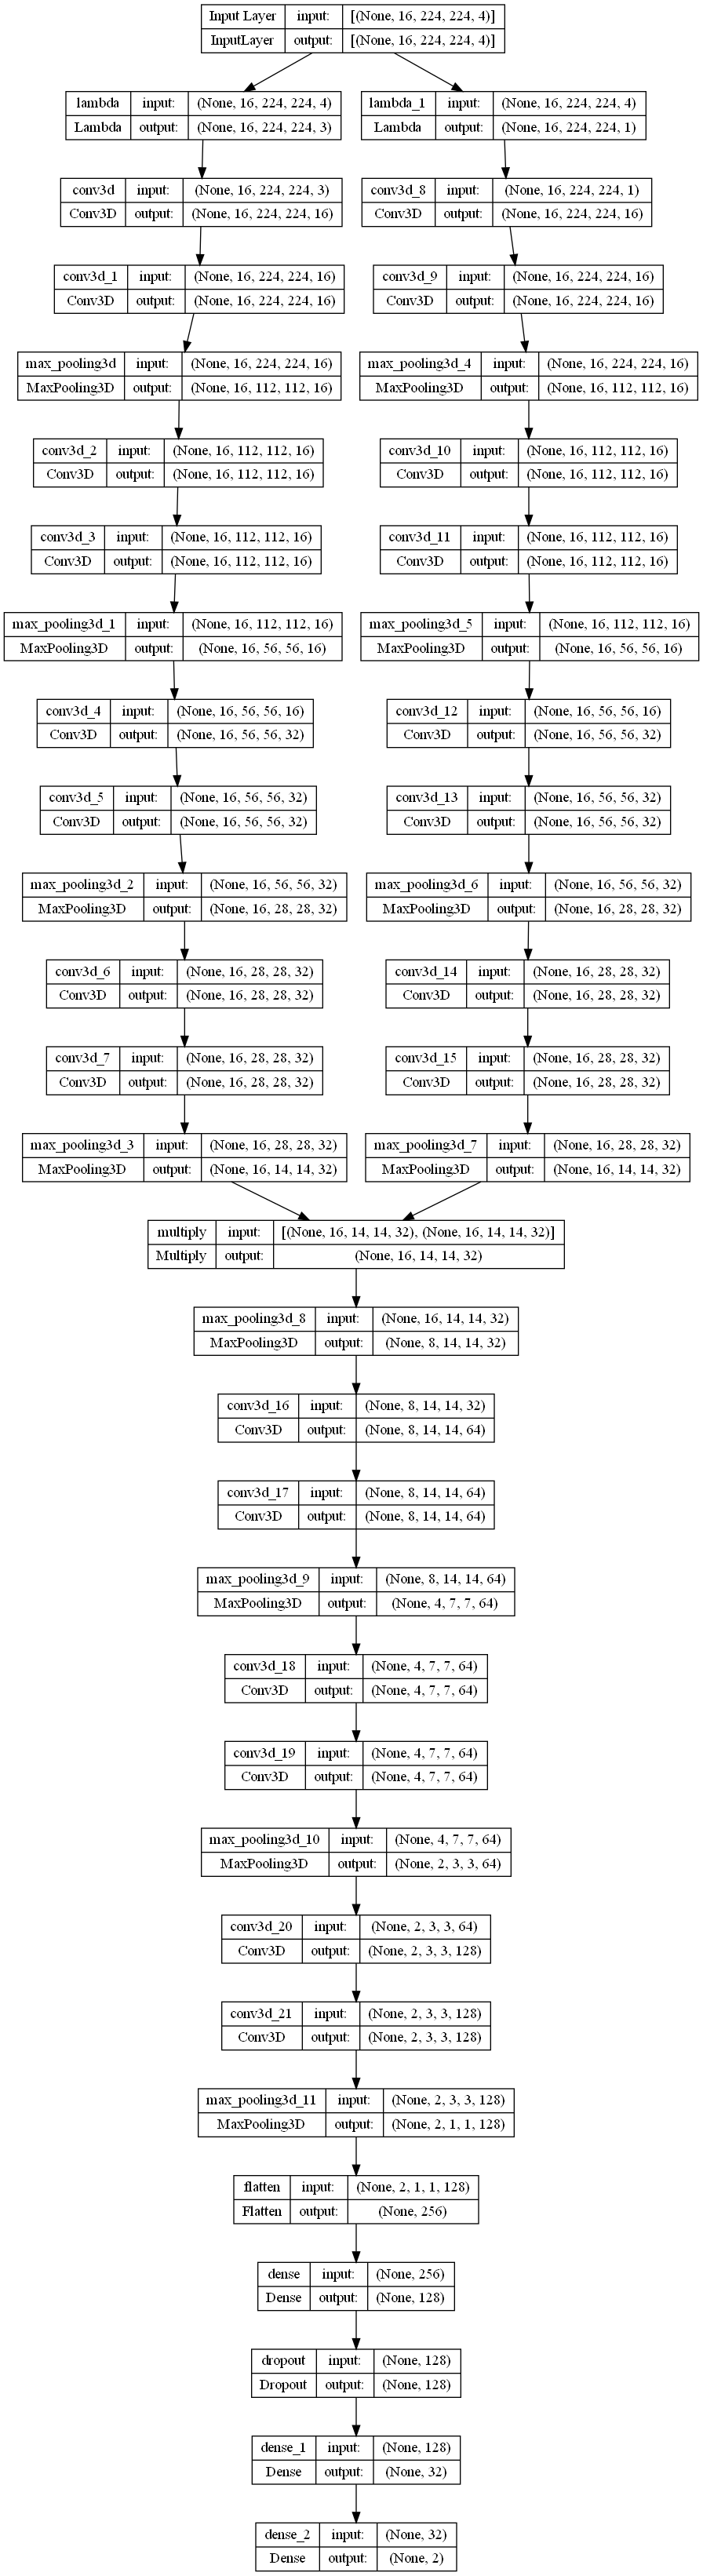

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

## Breaking Videos into Frames and <br>Creating CSV of each Batch for faster generator

In [1]:
import utilities as ut
path = os.path.join('datasets','RWF-2000')
RWF = ut.Preprocess(path)
RWF.dataframe(6,'Flows',seq_length=30,num_threads=100,toSequence=True,toDelete=True,createCSV=True,target_size=(224,224))

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Creating Directories: 100%|██████████| 3/3 [00:00<00:00, 3007.39it/s]


Discovered 2000 Videos


Creating CSV: 100%|██████████| 60000/60000 [00:10<00:00, 5868.98it/s]


## Creating generator

In [4]:
batch_size = 4
STRIDE = 2
SEQUENCE_LENGTH = 16
SIZE=(224,224)

In [5]:
from gen.frame_generator import FrameGenerator

## Generator for differences

In [6]:
path = os.path.join("datasets","RWF-2000 Flows","data_files","train")
train_gen_diff = FrameGenerator(color_jitter=[15,30,30],brightness_range=[0.7,1.5],rotation_range=20,horizontal_flip=True,pepper_ratio=90,salt_ratio=90)
params = {
    'batch_size':batch_size,
    'target_size':SIZE,
    'temporal_stride': STRIDE,
    'append_diff': True,
    'temporal_length': SEQUENCE_LENGTH}
train_data_diff = train_gen_diff.flow_from_CSV(path,**params)

path = os.path.join("datasets","RWF-2000 Flows","data_files","val")
valid_gen_diff = FrameGenerator()
params = {
    'batch_size':batch_size,
    'target_size':SIZE,
    'temporal_stride': STRIDE,
    'append_diff': True,
    'shuffle':False,
    'temporal_length': SEQUENCE_LENGTH}
valid_data_diff = valid_gen_diff.flow_from_CSV(path,**params)

Found 204800 images in total, consisting of 12800 sequences across 2 classes
Found 51200 images in total, consisting of 3200 sequences across 2 classes


## Generator for optical flows

In [7]:
path = os.path.join("datasets","RWF-2000 Flows","data_files","train")
train_gen_flows = FrameGenerator(color_jitter=[15,30,30],brightness_range=[0.7,1.5],rotation_range=20,horizontal_flip=True,pepper_ratio=90,salt_ratio=90)
params = {
    'batch_size':batch_size,
    'target_size':SIZE,
    'temporal_stride': STRIDE,
    'append_flows': True,
    'temporal_length': SEQUENCE_LENGTH}
train_data_flows = train_gen_flows.flow_from_CSV(path,**params)

path = os.path.join("datasets","RWF-2000 Flows","data_files","val")
valid_gen_flows = FrameGenerator()
params = {
    'batch_size':batch_size,
    'target_size':SIZE,
    'temporal_stride': STRIDE,
    'append_flows': True,
    'shuffle':False,
    'temporal_length': SEQUENCE_LENGTH}
valid_data_flows = valid_gen_flows.flow_from_CSV(path,**params)

Found 204800 images in total, consisting of 12800 sequences across 2 classes
Found 51200 images in total, consisting of 3200 sequences across 2 classes


## Check what generators output

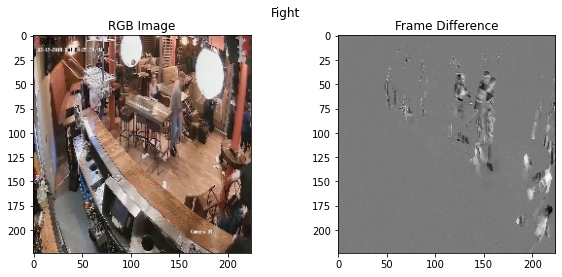

In [109]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 
[x,label] = next(valid_data_diff)
rgb_image = x[0, 2, :, :, :3]
grayscale_image = x[0, 2, :, :, 3]
lab = 'Fight' if label[0] == 0.0 else 'NonFight'
axes[0].imshow(rgb_image)
axes[0].set_title("RGB Image")

axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Frame Difference")
fig.suptitle(lab)
plt.show() 

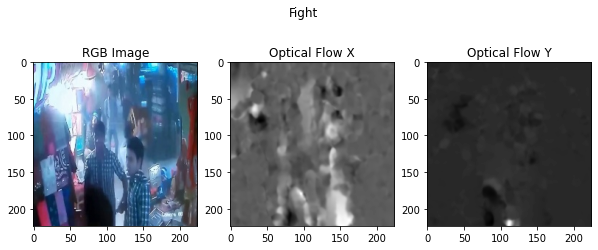

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4)) 
[x,label] = next(valid_data_flows)
rgb_image = x[0, 2, :, :, :3]
flow_x = x[0, 2, :, :, 3]
flow_y = x[0, 2, :, :, 4]
lab = 'Fight' if label[0] == 0.0 else 'NonFight'
axes[0].imshow(rgb_image)
axes[0].set_title('RGB Image')

axes[1].imshow(flow_x, cmap='gray')
axes[1].set_title('Optical Flow X')

axes[2].imshow(flow_y, cmap='gray')
axes[2].set_title('Optical Flow Y')
fig.suptitle(lab)
plt.show() 

## Compiling and fitting models 

In [15]:
model_diff.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr=0.0001,  momentum=0.9),metrics=['accuracy'])

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Callbacks for Difference Model

In [24]:
checkpoint_diff = tf.keras.callbacks.ModelCheckpoint('models/flow-gated-diff.h5',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
callbacks_diff = [checkpoint_diff,early_stopping]

## Callbacks for Optical Flow Model

In [25]:
checkpoint_flow = tf.keras.callbacks.ModelCheckpoint('models/flow-gated-flows.h5',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
callbacks_flow = [checkpoint_flow,early_stopping]

In [17]:
history_diff = model_diff.fit(train_data_diff,batch_size=batch_size,validation_data=valid_data_diff,callbacks=callbacks,epochs=20,verbose=1)

Epoch 1/20
3200/3200 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.5711
Epoch 1: val_accuracy improved from -inf to 0.64719, saving model to models\flow-gated-flows.h5
3200/3200 [==============================] - 4115s 1s/step - loss: 0.6750 - accuracy: 0.5711 - val_loss: 0.6051 - val_accuracy: 0.6472
Epoch 2/20
3200/3200 [==============================] - ETA: 0s - loss: 0.6453 - accuracy: 0.6248
Epoch 2: val_accuracy improved from 0.64719 to 0.68125, saving model to models\flow-gated-flows.h5
3200/3200 [==============================] - 4141s 1s/step - loss: 0.6453 - accuracy: 0.6248 - val_loss: 0.5720 - val_accuracy: 0.6812
Epoch 3/20
3200/3200 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.6545
Epoch 3: val_accuracy improved from 0.68125 to 0.69531, saving model to models\flow-gated-flows.h5
3200/3200 [==============================] - 4124s 1s/step - loss: 0.6221 - accuracy: 0.6545 - val_loss: 0.5809 - val_accuracy: 0.6953
Epoch 4

KeyboardInterrupt: 

In [20]:
#name is wrong
model_diff.load_weights('models/flow-gated-flows.h5')

In [21]:
history_diff_2 = model_diff.fit(train_data_diff,batch_size=batch_size,validation_data=valid_data_diff,callbacks=callbacks_diff,epochs=10,verbose=1)

Epoch 1/10
3200/3200 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7341
Epoch 1: val_accuracy did not improve from 0.74187
3200/3200 [==============================] - 3978s 1s/step - loss: 0.5333 - accuracy: 0.7341 - val_loss: 0.5152 - val_accuracy: 0.7331
Epoch 2/10
3200/3200 [==============================] - ETA: 0s - loss: 0.5088 - accuracy: 0.7505
Epoch 2: val_accuracy improved from 0.74187 to 0.74313, saving model to models\flow-gated-flows.h5
3200/3200 [==============================] - 3915s 1s/step - loss: 0.5088 - accuracy: 0.7505 - val_loss: 0.4859 - val_accuracy: 0.7431
Epoch 3/10
3200/3200 [==============================] - ETA: 0s - loss: 0.4949 - accuracy: 0.7598
Epoch 3: val_accuracy improved from 0.74313 to 0.75094, saving model to models\flow-gated-flows.h5
3200/3200 [==============================] - 3922s 1s/step - loss: 0.4949 - accuracy: 0.7598 - val_loss: 0.4840 - val_accuracy: 0.7509
Epoch 4/10
3200/3200 [==============================

In [23]:
model_diff.save('models/flow-gated-diff-1.h5')

In [26]:
model_diff.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
history_diff_3 = model_diff.fit(train_data_diff,batch_size=batch_size,validation_data=valid_data_diff,callbacks=callbacks_diff,epochs=10,verbose=1)

Epoch 1/10
3200/3200 [==============================] - ETA: 0s - loss: 0.4210 - accuracy: 0.8084
Epoch 1: val_accuracy improved from -inf to 0.79750, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4135s 1s/step - loss: 0.4210 - accuracy: 0.8084 - val_loss: 0.4432 - val_accuracy: 0.7975
Epoch 2/10
3200/3200 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8246
Epoch 2: val_accuracy improved from 0.79750 to 0.79844, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4022s 1s/step - loss: 0.3977 - accuracy: 0.8246 - val_loss: 0.4390 - val_accuracy: 0.7984
Epoch 3/10
3200/3200 [==============================] - ETA: 0s - loss: 0.3771 - accuracy: 0.8309
Epoch 3: val_accuracy improved from 0.79844 to 0.80031, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4017s 1s/step - loss: 0.3771 - accuracy: 0.8309 - val_loss: 0.4530 - val_accuracy: 0.8003
Epoch 4/10

In [29]:
model_diff.save('models/flow-gated-diff-08216.h5')

In [30]:
history_diff_4 = model_diff.fit(train_data_diff,batch_size=batch_size,validation_data=valid_data_diff,callbacks=callbacks_diff,epochs=20,verbose=1)

Epoch 1/20
3200/3200 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9129
Epoch 1: val_accuracy improved from 0.82156 to 0.82250, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4367s 1s/step - loss: 0.2106 - accuracy: 0.9129 - val_loss: 0.5368 - val_accuracy: 0.8225
Epoch 2/20
3200/3200 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9165
Epoch 2: val_accuracy improved from 0.82250 to 0.82313, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4376s 1s/step - loss: 0.2007 - accuracy: 0.9165 - val_loss: 0.5427 - val_accuracy: 0.8231
Epoch 3/20
3200/3200 [==============================] - ETA: 0s - loss: 0.1887 - accuracy: 0.9230
Epoch 3: val_accuracy improved from 0.82313 to 0.83500, saving model to models\flow-gated-diff.h5
3200/3200 [==============================] - 4291s 1s/step - loss: 0.1887 - accuracy: 0.9230 - val_loss: 0.5210 - val_accuracy: 0.8350
Epoch 4

In [35]:
model_diff.save('models/flow-gated-diff-08350.h5')

In [114]:
path = os.path.join("datasets","RWF-2000 Flows","data_files","train")
train_gen_diff = FrameGenerator(color_jitter=[15,45,45],brightness_range=[0.5,1.5],rotation_range=35,horizontal_flip=True,pepper_ratio=70,salt_ratio=70)
params = {
    'batch_size':batch_size,
    'target_size':SIZE,
    'temporal_stride': 2,
    'append_diff': True,
    'shuffle': True,
    'temporal_length': SEQUENCE_LENGTH}
train_data_diff = train_gen_diff.flow_from_CSV(path,**params)

Found 204800 images in total, consisting of 12800 sequences across 2 classes


In [83]:
checkpoint_diff = tf.keras.callbacks.ModelCheckpoint('models/flow-gated-diff-adagrad.h5',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
callbacks_diff = [checkpoint_diff,early_stopping]

In [85]:
adadelta = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.97)
model_diff.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta,metrics=['accuracy'])
history_adadelta = model_diff.fit(train_data_diff,batch_size=batch_size,validation_data=valid_data_diff,callbacks=callbacks_diff,epochs=20,verbose=1)

Epoch 1/20
2000/2000 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.7680
Epoch 1: val_accuracy improved from -inf to 0.80937, saving model to models\flow-gated-diff-adagrad.h5
2000/2000 [==============================] - 3581s 2s/step - loss: 0.5087 - accuracy: 0.7680 - val_loss: 0.4556 - val_accuracy: 0.8094
Epoch 2/20
2000/2000 [==============================] - ETA: 0s - loss: 0.4620 - accuracy: 0.7944
Epoch 2: val_accuracy improved from 0.80937 to 0.82812, saving model to models\flow-gated-diff-adagrad.h5
2000/2000 [==============================] - 3291s 2s/step - loss: 0.4620 - accuracy: 0.7944 - val_loss: 0.4091 - val_accuracy: 0.8281
Epoch 3/20
2000/2000 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.8069
Epoch 3: val_accuracy did not improve from 0.82812
2000/2000 [==============================] - 3125s 2s/step - loss: 0.4308 - accuracy: 0.8069 - val_loss: 0.4569 - val_accuracy: 0.8219
Epoch 4/20
2000/2000 [===================

In [87]:
model_diff.save("models/adadelta-08619.h5")

## Print Data to use in thesis

In [199]:
def plot_histories(histories, start_epochs,end_epochs, labels, vlines, vlines_labels,metric,title):
    """
    histories: list of History objects
    start_epochs: list of start epochs to plot from each History object
    labels: list of labels for the plots
    vlines: list of x-coordinates where vertical lines should be drawn
    vlines_labels: list of labels for the vertical lines
    """
    assert len(histories) == len(start_epochs) == len(labels)==len(end_epochs)
    assert len(vlines) == len(vlines_labels)

    plt.figure()

    # Variable to keep track of the cumulative number of epochs
    epoch_offset = 0

    for i, history in enumerate(histories):
        # Extract loss values and epochs to plot
        values = history.history[metric][start_epochs[i]:end_epochs[i]]
        epochs = range(epoch_offset, epoch_offset + len(values))

        # Plot the loss values
        plt.plot(epochs, values, label=labels[i])

        epoch_offset += len(values) -1

    # Add vertical lines
    for x, label in zip(vlines, vlines_labels):
        plt.axvline(x=x, color='r', linestyle='--')
        plt.text(x, plt.gca().get_ylim()[1], label, rotation=45,color='red')
    plt.xticks(range(0,epoch_offset,2))
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.legend()
    plt.title(title)
    plt.show()


In [159]:
from tensorflow.keras.callbacks import History

# Assuming you have history1 and history2 from two separate runs

# Create a new history object
history_Adam = History()

# Concatenate the relevant values from history1 and history2
history_Adam.history = {
    'loss': history_diff_3.history['loss'] + history_diff_4.history['loss'],
    'accuracy': history_diff_3.history['accuracy'] + history_diff_4.history['accuracy'],
    'val_loss': history_diff_3.history['val_loss'] + history_diff_4.history['val_loss'],
    'val_accuracy': history_diff_3.history['val_accuracy'] + history_diff_4.history['val_accuracy']
}

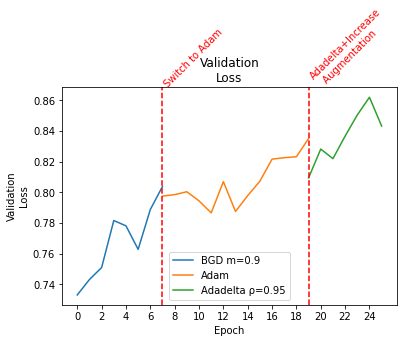

In [205]:
histories = [history_diff_2, history_Adam,history_adadelta]
start_epochs=[0,0,0]
end_epochs=[8,13,7]
vlines = [7,19] 
labels = ['BGD m=0.9','Adam','Adadelta ρ=0.95']
vlines_labels = ['Switch to Adam', 'Adadelta+Increase\n  Augmentation']  
plot_histories(histories, start_epochs,end_epochs, labels, vlines, vlines_labels,'val_accuracy',"Validation\nLoss")

In [204]:
from sklearn.metrics import classification_report
import numpy as np
model_diff.load_weights('models/adadelta-08619.h5')
y_pred = model_diff.predict(valid_data_diff)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = valid_data_diff.classes
report_RWF = classification_report(y_true, y_pred_labels)
print(report_RWF)

800/800 [==============================] - 180s 224ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1600
           1       0.85      0.86      0.86      1600

    accuracy                           0.85      3200
   macro avg       0.86      0.85      0.85      3200
weighted avg       0.86      0.85      0.85      3200



## Create original model and load author's weights

In [2]:
Input_Layer = Input(shape=(64,224,224,5),name='Input Layer') 
#RGB Stream
RGB_Layer1 = Lambda(lambda x: x[:,:,:,:,:3])(Input_Layer)
RGB_Layer2 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer1)
RGB_Layer3 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer2)
RGB_Layer4 = MaxPool3D((1,2,2))(RGB_Layer3)
RGB_Layer5 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer4)
RGB_Layer6 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer5)
RGB_Layer7 = MaxPool3D((1,2,2))(RGB_Layer6)

RGB_Layer8 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer7)
RGB_Layer9 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer8)
RGB_Layer10 = MaxPool3D((1,2,2))(RGB_Layer9)
RGB_Layer11 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer10)
RGB_Layer12 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(RGB_Layer11)
RGB_Layer13 = MaxPool3D((1,2,2))(RGB_Layer12)

#Optical Flow Stream
Flow_Layer1 = Lambda(lambda x: x[:,:,:,:,3:5])(Input_Layer)
Flow_Layer2 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer1)
Flow_Layer3 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer2)
Flow_Layer4 = MaxPool3D((1,2,2))(Flow_Layer3)
Flow_Layer5 = Conv3D(filters=16, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer4)
Flow_Layer6 = Conv3D(filters=16, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer5)
Flow_Layer7 = MaxPool3D((1,2,2))(Flow_Layer6)

Flow_Layer8 = Conv3D(filters=32, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer7)
Flow_Layer9 = Conv3D(filters=32, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Flow_Layer8)
Flow_Layer10 = MaxPool3D((1,2,2))(Flow_Layer9)
Flow_Layer11 = Conv3D(filters=32, kernel_size=(1,3,3),activation='sigmoid',padding='same',kernel_initializer='he_normal')(Flow_Layer10)
Flow_Layer12 = Conv3D(filters=32, kernel_size=(3,1,1),activation='sigmoid',padding='same',kernel_initializer='he_normal')(Flow_Layer11)
Flow_Layer13 = MaxPool3D((1,2,2))(Flow_Layer12)


#Fusion and Pooling
Fusion_Layer = Multiply()([RGB_Layer13,Flow_Layer13])
Pool = MaxPool3D((8,1,1))(Fusion_Layer)

#Merging Block
Merge_Layer_2 = Conv3D(filters=64, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Pool)
Merge_Layer_3 = Conv3D(filters=64, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_2)
Merge_Layer_4 = MaxPool3D((2,2,2))(Merge_Layer_3)

Merge_Layer_5 = Conv3D(filters=64, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_4)
Merge_Layer_6 = Conv3D(filters=64, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_5)
Merge_Layer_7 = MaxPool3D((2,2,2))(Merge_Layer_6)

Merge_Layer_2_2 = Conv3D(filters=128, kernel_size=(1,3,3),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_7)
Merge_Layer_2_3 = Conv3D(filters=128, kernel_size=(3,1,1),activation='relu',padding='same',kernel_initializer='he_normal')(Merge_Layer_2_2)
Merge_Layer_2_4 = MaxPool3D((1,2,2))(Merge_Layer_2_3)


#Fully Connected Layers
FC_1 = Flatten()(Merge_Layer_2_4)
FC_2 = Dense(128,activation='relu')(FC_1)
FC_3 = Dropout(0.2)(FC_2)
FC_4 = Dense(32,activation='relu')(FC_3)

output = Dense(2,activation='softmax')(FC_4)

model_opt = Model(inputs=Input_Layer,outputs=output)

In [211]:
path = os.path.join('datasets','RWF-2000')
RWF = ut.Preprocess(path)
RWF.dataframe(13,'Flows-13FPS',num_threads=100,toSequence=True,toDelete=True,createCSV=True,target_size=(224,224))

Creating Directories: 100%|██████████| 3/3 [00:00<00:00, 3005.95it/s]


Discovered 2000 Videos


Creating CSV: 100%|██████████| 130000/130000 [00:10<00:00, 12297.08it/s]


## Compare time complexities of two models

In [5]:
path = os.path.join("datasets","RWF-2000 Flows","data_files","val")
valid_gen_diff = FrameGenerator()
params = {
    'batch_size':1,
    'target_size':(224,224),
    'temporal_stride': 2,
    'append_diff': True,
    'shuffle':False,
    'temporal_length': 16}
valid_data_diff = valid_gen_diff.flow_from_CSV(path,**params)

Found 51200 images in total, consisting of 3200 sequences across 2 classes


In [20]:
import time
prediction_times_diff = []
for i in range(1000):    
    images, _ = next(valid_data_diff)
    
    start_time = time.time()
    _ = model_diff.predict(images,verbose=0)
    elapsed_time = time.time() - start_time
    prediction_times_diff.append(elapsed_time)

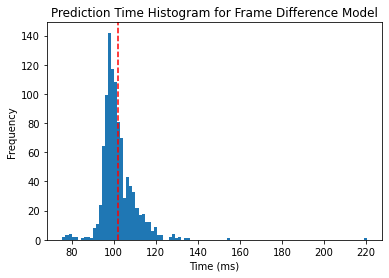

In [21]:
import matplotlib.pyplot as plt
prediction_times_diff = np.array(prediction_times_diff)*1000
mean_time = np.mean(prediction_times_diff)
plt.hist(prediction_times_diff, bins=100)
plt.axvline(mean_time, color='r', linestyle='--', label='Mean')
#plt.xlim(0, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Prediction Time Histogram for Frame Difference Model')
plt.show()

In [3]:
path = os.path.join("datasets","RWF-2000 Flows-13FPS","data_files","val")
valid_gen_flows = FrameGenerator()
params = {
    'batch_size':1,
    'target_size':(224,224),
    'temporal_stride': 2,
    'append_flows': True,
    'shuffle': False,
    'temporal_length': 64}
valid_data_flows = valid_gen_flows.flow_from_CSV(path,**params)

Found 25600 images in total, consisting of 400 sequences across 2 classes


In [4]:
import time
model_opt.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.SGD(lr=0.0001),metrics=['accuracy'])
prediction_times_flows = []
for i in range(100):    
    start_time = time.time()
    images, _ = next(valid_data_flows)
    _ = model_opt.predict(images,verbose=0)
    elapsed_time = time.time() - start_time
    prediction_times_flows.append(elapsed_time)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


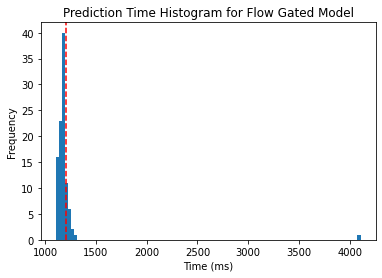

In [8]:
import matplotlib.pyplot as plt
prediction_times_flows = np.array(prediction_times_flows)*1000
mean_time = np.mean(prediction_times_flows)
plt.hist(prediction_times_flows, bins=100)
plt.axvline(mean_time, color='r', linestyle='--', label='Mean')
#plt.xlim(0, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Prediction Time Histogram for Flow Gated Model')
plt.show()